In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split
import time
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputClassifier
from sklearn.utils import shuffle

/home/veruska/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data_path = '../../data/output/normalized_data_X_5p.csv'
y_path = '../../data/output/y_5p.csv'

data = pd.read_csv(data_path)
y = pd.read_csv(y_path)
print(data.shape)
print(y.shape)
data.head()

(69884, 420)
(69884, 1)


,route,tripNum,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,...,alertTypeSB_ACCIDENT,alertTypeSB_CHIT_CHAT,alertTypeSB_HAZARD,alertTypeSB_JAM,alertTypeSB_NORMAL,alertTypeSB_POLICE,alertTypeSB_ROAD_CLOSED,jamBlockTypeSB_-,jamBlockTypeSB_NORMAL,jamBlockTypeSB_ROAD_CLOSED_EVENT
0,0.118068,0.0,0.084945,0.264128,0.439400,0.010487,0.0,0.000006,0.265656,0.439493,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.118068,0.0,0.084965,0.264428,0.443488,0.014304,0.0,0.000009,0.265956,0.444051,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.118068,0.0,0.084972,0.263625,0.448606,0.018030,0.0,0.000010,0.264915,0.448957,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.118068,0.0,0.084979,0.261608,0.458297,0.025182,0.0,0.000014,0.263352,0.456961,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.118068,0.0,0.084985,0.260228,0.463266,0.028953,0.0,0.000000,0.261792,0.463170,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [3]:
# Making training and test data: 80% Training, 20% Test
random.seed(15) #to get always the same set
train_X, test_X, train_Y, test_Y = train_test_split(data, y, test_size=0.20, random_state=7)

In [4]:
def rmse_cv(model, X_train, y_train):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = "f1", cv = 5))
    return(rmse)

# function to plot the RMSE vs parameter value
def plot_rmse_param(series, param_name):
    series.plot(title = "Validation Error vs " + param_name)
    plt.xlabel(param_name)
    plt.ylabel("RMSE")
    
# function to get the best RMSE and the best parameter value of the model
def best_rmse_param(series):
    best_rmse = series.min()
    best_param = series.idxmin() 
    
    return(best_rmse, best_param)

### KNN

In [ ]:
start = time.time()

ks = [3, 5, 10, 25, 50, 100]
cv_knn_rmse = [rmse_cv(KNeighborsClassifier(n_neighbors = k), train_X, train_Y).mean() 
            for k in ks]

series = pd.Series(cv_knn_rmse, index = ks)
plot_rmse_param(series, "ks")
best_rmse_knn, best_k_knn = best_rmse_param(series)

/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


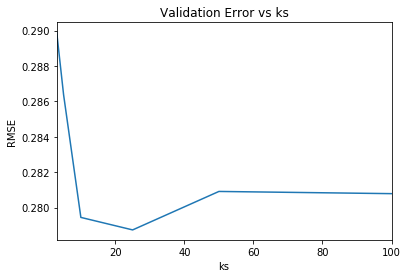

In [14]:
plot_rmse_param(series, "ks")
best_rmse_knn, best_k_knn = best_rmse_param(series)

In [ ]:
print("best_k_knn: " + str(best_k_knn))

In [7]:
random.seed(42)

try:
    start
except NameError: # start does not exist at all
    start = time.time()


knn = KNeighborsClassifier(n_jobs=-1) #5-0.42, 10-0.32, 5 distance:0.49, 5 auto:0.42
knn.fit(train_X, train_Y)

end = time.time()
print("Execution time: " + str((end - start)/60) + " min")

Execution time: 8.265177408854167e-07 min


In [10]:
# Saving a pickle file for the model
joblib.dump(knn, 'Saved_KNN_5_distance.pkl')

['Saved_KNN_5_distance.pkl']

In [6]:
start_p = time.time()

pred_array = knn.predict(test_X)

end_p = time.time()
print("Prediction execution time: " + str((end_p - start_p)/60) + " min")

Prediction execution time: 41.21838433345159 min


In [11]:
pd.DataFrame(pred_array, columns=['predictions']).to_csv('prediction_knn_5_distance.csv')

In [17]:
start_p = time.time()

knn.predict(test_X.iloc[0:1]) #just one

end_p = time.time()
print("Execution time: " + str((end_p - start_p)/60) + " min")

Execution time: 0.0017618894577026366 min


In [7]:
pred_array

array([0., 1., 0., ..., 0., 0., 0.])

In [9]:
test_X.shape
#13977 - 2 min

(286527, 420)

In [8]:
# Bus Bunching
accuracy = accuracy_score(test_Y, pred_array)
precision = precision_score(test_Y, pred_array)
recall = recall_score(test_Y, pred_array)
f_measure = f1_score(test_Y, pred_array)

In [10]:
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9176504256993633
Precision: 0.5992366412213741
Recall: 0.46210448859455483
F-measure: 0.521811383464894


In [9]:
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.881550429802427
Precision: 0.5807563727538655
Recall: 0.4323042227233844
F-measure: 0.4956533368998261
